<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Projects/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [96]:
advertisement  = pd.read_csv('/content/Advertising.csv')
print(advertisement.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [97]:
print(advertisement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [98]:
print(advertisement.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [99]:
print(advertisement.shape)

(200, 5)


###Preprocessing and Visualization

In [100]:
#Check if there are any duplicate
advertisement.duplicated().sum()

0

In [101]:
advertisement = advertisement.drop(columns = 'Unnamed: 0')
print(advertisement.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


<Axes: >

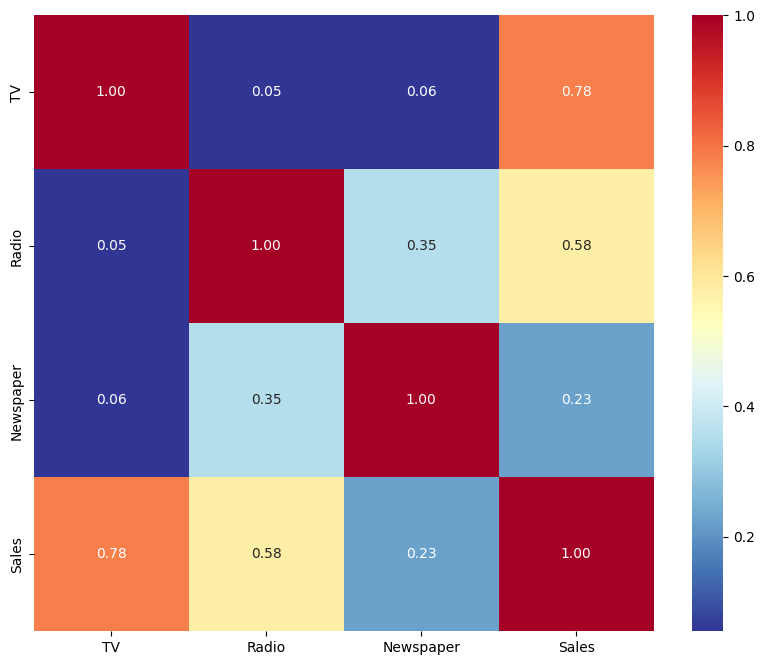

In [102]:
corr_matrix = advertisement.corr()


plt.figure(figsize=(10, 8))

#heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', fmt=".2f")


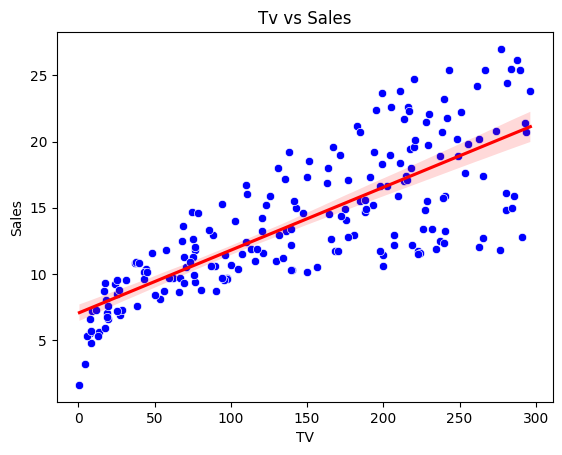

In [103]:
#Since sales is the target variable...Scatterplots for comparisons

sns.scatterplot(x='TV',y='Sales',data=advertisement,color='b')
sns.regplot(x='TV',y='Sales',data=advertisement,scatter=False, color='r')
plt.title('Tv vs Sales')
plt.show()

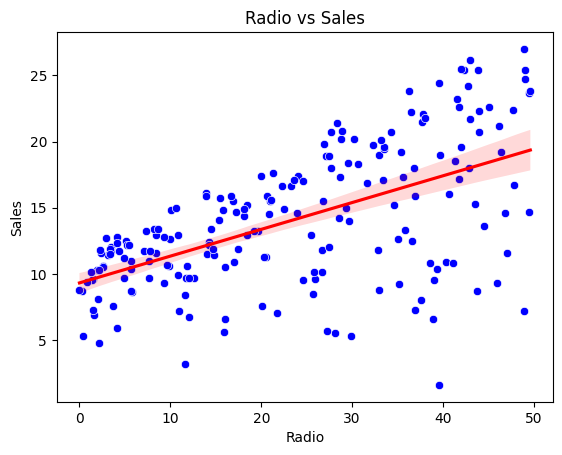

In [104]:
sns.scatterplot(x='Radio',y='Sales',data=advertisement,color='b')
sns.regplot(x='Radio',y='Sales',data=advertisement,scatter=False, color='r')
plt.title('Radio vs Sales')
plt.show()

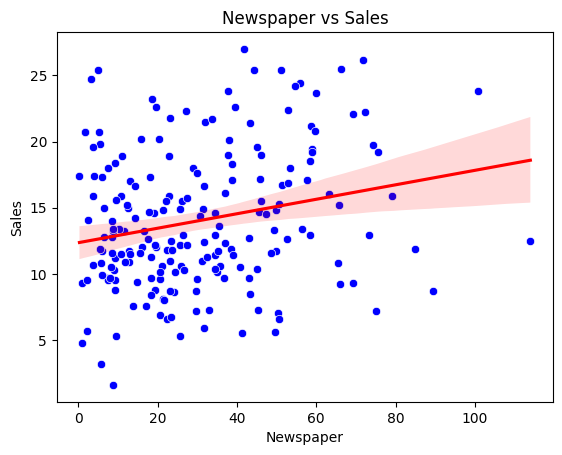

In [105]:
sns.scatterplot(x='Newspaper',y='Sales',data=advertisement,color='b')
sns.regplot(x='Newspaper',y='Sales',data=advertisement,scatter=False, color='r')
plt.title('Newspaper vs Sales')
plt.show()

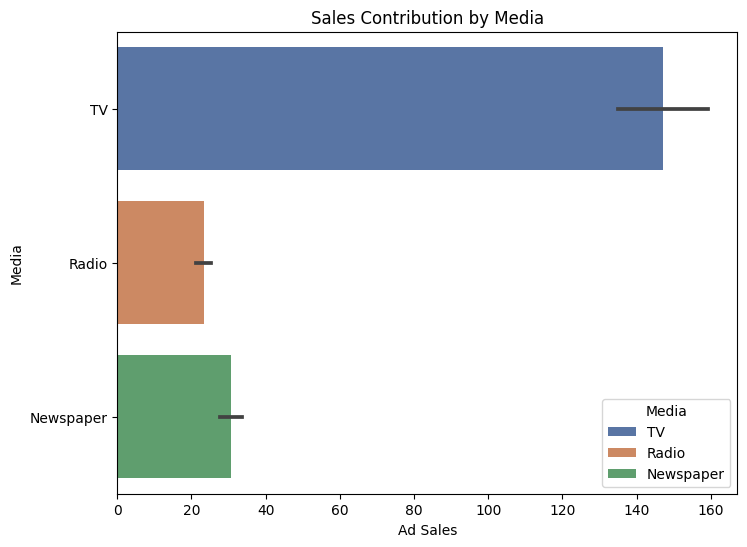

In [106]:
# Reshape the DataFrame to long format
df_long = pd.melt(advertisement, id_vars=['Sales'], var_name='Media', value_name='Ad Sales')

# Using a Seaborn palette (e.g., "deep")
sns.set_palette("deep")

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Ad Sales', y='Media', hue='Media', data=df_long, dodge=False)

# Add a title
plt.title('Sales Contribution by Media')

# Display the plot
plt.show()


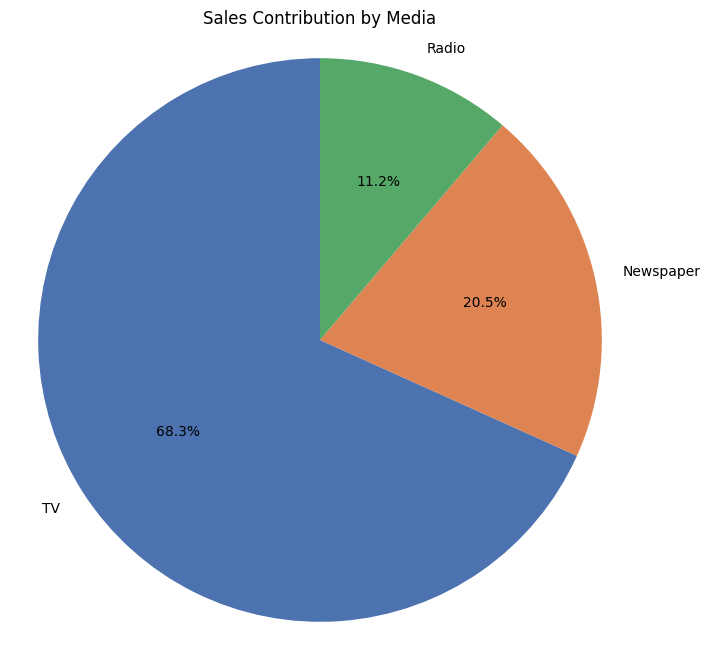

In [107]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('deep')
plt.pie(advertisement.loc[0, ['TV', 'Newspaper', 'Radio']], labels=['TV', 'Newspaper', 'Radio'],
        autopct='%1.1f%%', startangle=90, colors=colors)

#Aspect ratio to be equal so the pie is circular
plt.axis('equal')

plt.title('Sales Contribution by Media')

plt.show()


# Machine Learning

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [109]:
X = advertisement.drop(columns ='Sales')
y= advertisement['Sales']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

Linear Regression

In [119]:
lr_model = LinearRegression()

#FIT THE MODEL
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)

#Mean Absolute Error
mae_lr = mean_absolute_error(y_test,pred)
print('Mean absolute error:', mae_lr)

#Mean Squared Error
mse_lr = mean_squared_error(y_test,pred)
print('Mean squared error:', mse_lr)

#R squared error
rs_lr = r2_score(y_test,pred)
print('r squared error:', rs_lr)

Mean absolute error: 1.3507390587321368
Mean squared error: 2.759364453171171
r squared error: 0.9220737408493858


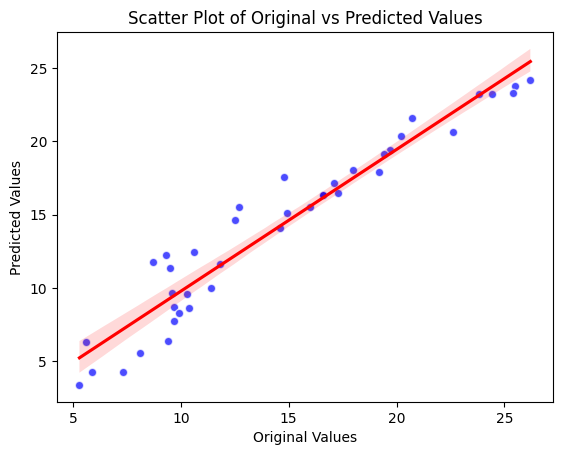

In [120]:
# Scatter plot
plt.scatter(y_test, y=pred, alpha=0.7, color='blue', edgecolors='w')

#a trendline or regression line
sns.regplot(x=y_test, y=pred, scatter=False, color='red')

#Labels and title
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Original vs Predicted Values')


plt.show()

Random Forest Regression

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
random_model = RandomForestRegressor()

#Fit the model
random_model.fit(X_train,y_train)

#Prediction
pred = random_model.predict(X_test)

#Mean Absolute Error
mae_rm = mean_absolute_error(y_test,pred)
print('Mean absolute error:', mae_rm)

#Mean Squared Error
mse_rm = mean_squared_error(y_test,pred)
print('Mean squared error:', mse_rm)

#R squared error
rs_rm = r2_score(y_test,pred)
print('r squared error:', rs_rm)

Mean absolute error: 0.698274999999996
Mean squared error: 0.7147953249999931
r squared error: 0.9798137119322593


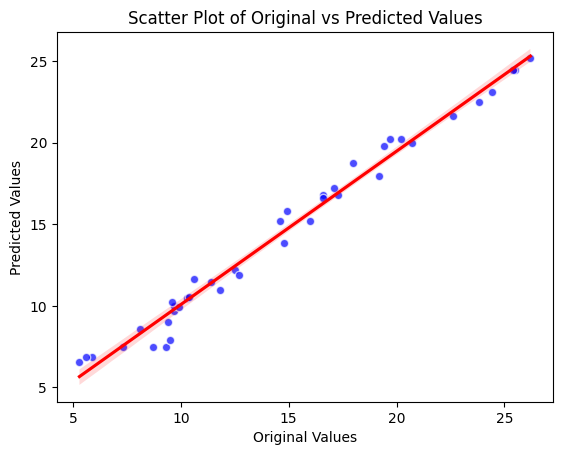

In [122]:
#Visualization
# Scatter plot
plt.scatter(y_test, y= pred, alpha=0.7, color='blue', edgecolors='w')

#a trendline or regression line
sns.regplot(x=y_test, y= pred, scatter=False, color='red')

#Labels and title
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Original vs Predicted Values')


plt.show()

# svm

In [116]:
from sklearn.svm import SVR

In [123]:
svr_model = SVR()

#Fit the model
svr_model.fit(X_train,y_train)

#Prediction
pred = svr_model.predict(X_test)

#Mean Absolute Error
mae_svr = mean_absolute_error(y_test,pred)
print('Mean absolute error:', mae_svr)

#Mean Squared Error
mse_svr = mean_squared_error(y_test,pred)
print('Mean squared error:', mse_svr)

#R squared error
rs_svr = r2_score(y_test,pred)
print('r squared error:', rs_svr)

Mean absolute error: 1.6934978296089835
Mean squared error: 6.551033596360304
r squared error: 0.8149945212392408


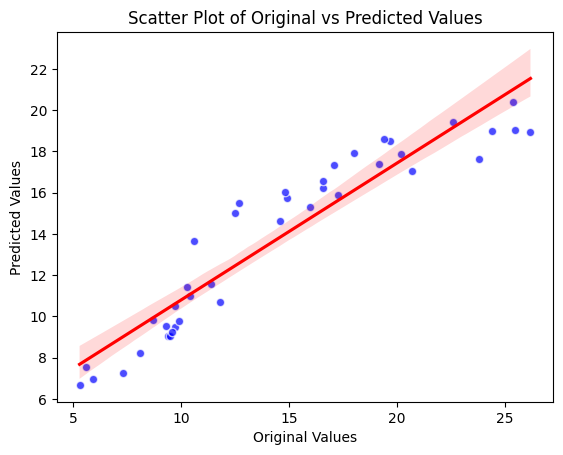

In [118]:
# Scatter plot
plt.scatter(y_test, y=pred, alpha=0.7, color='blue', edgecolors='w')

#a trendline or regression line
sns.regplot(x=y_test, y=pred, scatter=False, color='red')

#Labels and title
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Original vs Predicted Values')


plt.show()

In [125]:
data = {'models': ['Linear Regression','Random Forest Regression','SVR'],
        'MAE':  [mae_lr, mae_rm, mae_svr],
        'MSE':    [mse_lr, mse_rm,mse_svr],
        'R squared error':[rs_lr,rs_rm,rs_svr] }

df = pd.DataFrame(data)
df.sort_values(by=['MAE','MSE','R squared error'],ascending=True)

,models,MAE,MSE,R squared error
1,Random Forest Regression,0.698275,0.714795,0.979814
0,Linear Regression,1.350739,2.759364,0.922074
2,SVR,1.693498,6.551034,0.814995
